# Assignment 3

Data are from [https://zenodo.org/record/806811#.W7PD0y_Mz1L](https://zenodo.org/record/806811#.W7PD0y_Mz1L)


In [64]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(["science", "ieee"])
# from matplotlib.pyplot import figure
# figure(figsize=(8,6), dpi=80)

WRITEFIGS = False
if WRITEFIGS:
    matplotlib.use("pgf")
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
    })

pd.set_option("display.max_columns", 123)
pd.set_option("display.max_rows", 1223)

print("imports")

imports


In [65]:
survey_df = pd.read_csv("./data/survey_data.csv")

# Filters

print(f"{len(survey_df)} rows")
survey_df = survey_df[survey_df["STATUS"] == "Complete"]
print(f"{len(survey_df)} complete")
survey_df = survey_df[survey_df["POPULATION"] == "github"]
print(f"{len(survey_df)} github")
survey_df = survey_df[survey_df["PARTICIPATION.TYPE.ANY.REPONSE"] == 1]
print(f"{len(survey_df)} any response")
survey_df = survey_df[survey_df["TRANSLATED"] == 0]
print(f"{len(survey_df)} non-translated")

# Casting

survey_df["DATE.SUBMITTED"] = pd.to_datetime(survey_df["DATE.SUBMITTED"])
yes_no_columns = [
    "INFO.JOB",
    "RECEIVED.HELP",
    "PROVIDED.HELP",
    "DISCOURAGING.BEHAVIOR.LACK.OF.RESPONSE",
    "DISCOURAGING.BEHAVIOR.REJECTION.WOUT.EXPLANATION",
    "DISCOURAGING.BEHAVIOR.DISMISSIVE.RESPONSE",
    "DISCOURAGING.BEHAVIOR.BAD.DOCS",
    "DISCOURAGING.BEHAVIOR.CONFLICT",
    # "DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE",# also has 'not sure','prefer not to say'
    # "MINORITY.HOMECOUNTRY",
    # "MINORITY.CURRENT.COUNTRY",
    # "TRANSGENDER.IDENTITY",
    # "SEXUAL.ORIENTATION",
]

for column in yes_no_columns:
    survey_df[column] = survey_df[column].replace({"Yes": True, "No": False})


age_dict = {
    "35 to 44 years": (35 + 44) / 2,
    "17 or younger": (7 + 17) / 2,
    "25 to 34 years": (25 + 34) / 2,
    "18 to 24 years": (18 + 24) / 2,
    "45 to 54 years": (45 + 54) / 2,
    "55 to 64 years": (55 + 64) / 2,
    "65 years or older": (65 + 74) / 2,
}
survey_df["AGE"] = survey_df["AGE"].replace(age_dict)
age_first_dict = {
    "13 - 17 years old": (13 + 17) / 2,
    "Younger than 13 years old": (7 + 13) / 2,
    "18 - 24 years old": (18 + 24) / 2,
    "25 - 45 years old": (25 + 45) / 2,
    "Older than 45 years old": (45 + 65) / 2,
}
survey_df["AGE.AT.FIRST.COMPUTER.INTERNET"] = survey_df[
    "AGE.AT.FIRST.COMPUTER.INTERNET"
].replace(age_first_dict)

useful_columns = [
    # "RESPONSE.ID",
    # "DATE.SUBMITTED",
    # "STATUS",
    "PARTICIPATION.TYPE.FOLLOW",
    "PARTICIPATION.TYPE.USE.APPLICATIONS",
    "PARTICIPATION.TYPE.USE.DEPENDENCIES",
    "PARTICIPATION.TYPE.CONTRIBUTE",
    "PARTICIPATION.TYPE.OTHER",
    "CONTRIBUTOR.TYPE.CONTRIBUTE.CODE",
    "CONTRIBUTOR.TYPE.CONTRIBUTE.DOCS",
    "CONTRIBUTOR.TYPE.PROJECT.MAINTENANCE",
    "CONTRIBUTOR.TYPE.FILE.BUGS",
    "CONTRIBUTOR.TYPE.FEATURE.REQUESTS",
    "CONTRIBUTOR.TYPE.COMMUNITY.ADMIN",
    "EMPLOYMENT.STATUS",
    "PROFESSIONAL.SOFTWARE",
    "FUTURE.CONTRIBUTION.INTEREST",
    "FUTURE.CONTRIBUTION.LIKELIHOOD",
    "OSS.USER.PRIORITIES.LICENSE",
    "OSS.USER.PRIORITIES.CODE.OF.CONDUCT",
    "OSS.USER.PRIORITIES.CONTRIBUTING.GUIDE",
    "OSS.USER.PRIORITIES.CLA",
    "OSS.USER.PRIORITIES.ACTIVE.DEVELOPMENT",
    "OSS.USER.PRIORITIES.RESPONSIVE.MAINTAINERS",
    "OSS.USER.PRIORITIES.WELCOMING.COMMUNITY",
    "OSS.USER.PRIORITIES.WIDESPREAD.USE",
    "OSS.CONTRIBUTOR.PRIORITIES.LICENSE",
    "OSS.CONTRIBUTOR.PRIORITIES.CODE.OF.CONDUCT",
    "OSS.CONTRIBUTOR.PRIORITIES.CONTRIBUTING.GUIDE",
    "OSS.CONTRIBUTOR.PRIORITIES.CLA",
    "OSS.CONTRIBUTOR.PRIORITIES.ACTIVE.DEVELOPMENT",
    "OSS.CONTRIBUTOR.PRIORITIES.RESPONSIVE.MAINTAINERS",
    "OSS.CONTRIBUTOR.PRIORITIES.WELCOMING.COMMUNITY",
    "OSS.CONTRIBUTOR.PRIORITIES.WIDESPREAD.USE",
    "SEEK.OPEN.SOURCE",
    "OSS.UX",
    "OSS.SECURITY",
    "OSS.STABILITY",
    "INTERNAL.EFFICACY",
    "EXTERNAL.EFFICACY",
    "OSS.IDENTIFICATION",
    "USER.VALUES.STABILITY",
    "USER.VALUES.INNOVATION",
    "USER.VALUES.REPLICABILITY",
    "USER.VALUES.COMPATIBILITY",
    "USER.VALUES.SECURITY",
    "USER.VALUES.COST",
    "USER.VALUES.TRANSPARENCY",
    "USER.VALUES.USER.EXPERIENCE",
    "USER.VALUES.CUSTOMIZABILITY",
    "USER.VALUES.SUPPORT",
    "USER.VALUES.TRUSTED.PRODUCER",
    "TRANSPARENCY.PRIVACY.BELIEFS",
    "INFO.AVAILABILITY",
    "INFO.JOB",
    "TRANSPARENCY.PRIVACY.PRACTICES.GENERAL",
    "TRANSPARENCY.PRIVACY.PRACTICES.OSS",
    "RECEIVED.HELP",
    "FIND.HELPER",
    "HELPER.PRIOR.RELATIONSHIP",
    "RECEIVED.HELP.TYPE",
    "PROVIDED.HELP",
    "FIND.HELPEE",
    "HELPEE.PRIOR.RELATIONSHIP",
    "PROVIDED.HELP.TYPE",
    "DISCOURAGING.BEHAVIOR.LACK.OF.RESPONSE",
    "DISCOURAGING.BEHAVIOR.REJECTION.WOUT.EXPLANATION",
    "DISCOURAGING.BEHAVIOR.DISMISSIVE.RESPONSE",
    "DISCOURAGING.BEHAVIOR.BAD.DOCS",
    "DISCOURAGING.BEHAVIOR.CONFLICT",
    "DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE",
    "OSS.AS.JOB",
    "OSS.AT.WORK",
    "OSS.IP.POLICY",
    "EMPLOYER.POLICY.APPLICATIONS",
    "EMPLOYER.POLICY.DEPENDENCIES",
    "OSS.HIRING",
    "IMMIGRATION",
    "MINORITY.HOMECOUNTRY",
    "MINORITY.CURRENT.COUNTRY",
    "GENDER",
    "TRANSGENDER.IDENTITY",
    "SEXUAL.ORIENTATION",
    "WRITTEN.ENGLISH",
    "AGE",
    "FORMAL.EDUCATION",
    "PARENTS.FORMAL.EDUCATION",
    "AGE.AT.FIRST.COMPUTER.INTERNET",
    "LOCATION.OF.FIRST.COMPUTER.INTERNET",
    "PARTICIPATION.TYPE.ANY.REPONSE",
    # "POPULATION",
    # "OFF.SITE.ID",
    # "TRANSLATED",
]

survey_df = survey_df[useful_columns]

survey_df.head()

6029 rows
3746 complete
3302 github
3299 any response
3217 non-translated


,PARTICIPATION.TYPE.FOLLOW,PARTICIPATION.TYPE.USE.APPLICATIONS,PARTICIPATION.TYPE.USE.DEPENDENCIES,PARTICIPATION.TYPE.CONTRIBUTE,PARTICIPATION.TYPE.OTHER,CONTRIBUTOR.TYPE.CONTRIBUTE.CODE,CONTRIBUTOR.TYPE.CONTRIBUTE.DOCS,CONTRIBUTOR.TYPE.PROJECT.MAINTENANCE,CONTRIBUTOR.TYPE.FILE.BUGS,CONTRIBUTOR.TYPE.FEATURE.REQUESTS,CONTRIBUTOR.TYPE.COMMUNITY.ADMIN,EMPLOYMENT.STATUS,PROFESSIONAL.SOFTWARE,FUTURE.CONTRIBUTION.INTEREST,FUTURE.CONTRIBUTION.LIKELIHOOD,OSS.USER.PRIORITIES.LICENSE,OSS.USER.PRIORITIES.CODE.OF.CONDUCT,OSS.USER.PRIORITIES.CONTRIBUTING.GUIDE,OSS.USER.PRIORITIES.CLA,OSS.USER.PRIORITIES.ACTIVE.DEVELOPMENT,OSS.USER.PRIORITIES.RESPONSIVE.MAINTAINERS,OSS.USER.PRIORITIES.WELCOMING.COMMUNITY,OSS.USER.PRIORITIES.WIDESPREAD.USE,OSS.CONTRIBUTOR.PRIORITIES.LICENSE,OSS.CONTRIBUTOR.PRIORITIES.CODE.OF.CONDUCT,OSS.CONTRIBUTOR.PRIORITIES.CONTRIBUTING.GUIDE,OSS.CONTRIBUTOR.PRIORITIES.CLA,OSS.CONTRIBUTOR.PRIORITIES.ACTIVE.DEVELOPMENT,OSS.CONTRIBUTOR.PRIORITIES.RESPONSIVE.MAINTAINERS,OSS.CONTRIBUTOR.PRIORITIES.WELCOMING.COMMUNITY,OSS.CONTRIBUTOR.PRIORITIES.WIDESPREAD.USE,SEEK.OPEN.SOURCE,OSS.UX,OSS.SECURITY,OSS.STABILITY,INTERNAL.EFFICACY,EXTERNAL.EFFICACY,OSS.IDENTIFICATION,USER.VALUES.STABILITY,USER.VALUES.INNOVATION,USER.VALUES.REPLICABILITY,USER.VALUES.COMPATIBILITY,USER.VALUES.SECURITY,USER.VALUES.COST,USER.VALUES.TRANSPARENCY,USER.VALUES.USER.EXPERIENCE,USER.VALUES.CUSTOMIZABILITY,USER.VALUES.SUPPORT,USER.VALUES.TRUSTED.PRODUCER,TRANSPARENCY.PRIVACY.BELIEFS,INFO.AVAILABILITY,INFO.JOB,TRANSPARENCY.PRIVACY.PRACTICES.GENERAL,TRANSPARENCY.PRIVACY.PRACTICES.OSS,RECEIVED.HELP,FIND.HELPER,HELPER.PRIOR.RELATIONSHIP,RECEIVED.HELP.TYPE,PROVIDED.HELP,FIND.HELPEE,HELPEE.PRIOR.RELATIONSHIP,PROVIDED.HELP.TYPE,DISCOURAGING.BEHAVIOR.LACK.OF.RESPONSE,DISCOURAGING.BEHAVIOR.REJECTION.WOUT.EXPLANATION,DISCOURAGING.BEHAVIOR.DISMISSIVE.RESPONSE,DISCOURAGING.BEHAVIOR.BAD.DOCS,DISCOURAGING.BEHAVIOR.CONFLICT,DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE,OSS.AS.JOB,OSS.AT.WORK,OSS.IP.POLICY,EMPLOYER.POLICY.APPLICATIONS,EMPLOYER.POLICY.DEPENDENCIES,OSS.HIRING,IMMIGRATION,MINORITY.HOMECOUNTRY,MINORITY.CURRENT.COUNTRY,GENDER,TRANSGENDER.IDENTITY,SEXUAL.ORIENTATION,WRITTEN.ENGLISH,AGE,FORMAL.EDUCATION,PARENTS.FORMAL.EDUCATION,AGE.AT.FIRST.COMPUTER.INTERNET,LOCATION.OF.FIRST.COMPUTER.INTERNET,PARTICIPATION.TYPE.ANY.REPONSE
3,1,1,1,1,0,Frequently,Rarely,Frequently,Frequently,Frequently,Never,Employed full time,Frequently,Very interested,Very likely,Very important to have,Somewhat important not to have,Somewhat important to have,Not important either way,Somewhat important to have,Somewhat important to have,Very important to have,Somewhat important to have,Not important either way,Somewhat important not to have,Not important either way,Not important either way,Somewhat important to have,Somewhat important to have,Somewhat important to have,Somewhat important to have,Sometimes,Generally easier to use,Generally more secure,About the same,Strongly agree,Strongly agree,Neither agree nor disagree,Moderately important,Not at all important,Very important,Very important,Very important,Very important,Very important,Extremely important,Extremely important,Slightly important,Very important,People should be able to contribute code witho...,A lot of information about me,True,I include my real name.,I include my real name.,True,Other - Please describe,We knew each other well.,Writing code or otherwise implementing ideas.,True,I reached out to them to offer unsolicited help.,"Total strangers, I didn't know of them previou...",Writing code or otherwise implementing ideas.,True,True,True,True,True,No,"Yes, directly- some or all of my work duties ...",Frequently,I am free to contribute without asking for per...,Use of open source applications is acceptable ...,Use of open source dependencies is acceptable ...,Very important,"No, I live in the country where I was born.",NaN,No,Man,No,No,Very well,39.5,Bachelor's degree,Bachelor's degree,15.0,At home (belonging to me or a family member),1


In [66]:
neg_df = pd.read_csv("./data/negative_incidents.csv")
print(f"{len(neg_df)} rows")
neg_df = neg_df[neg_df["POPULATION"] == "github"]
print(f"{len(neg_df)} github")
neg_df = neg_df[neg_df["NEGATIVE.WITNESS.ANY.RESPONSE"] == 1]
print(f"{len(neg_df)} any response")
neg_df = neg_df[neg_df["NEGATIVE.EXPERIENCE.ANY.RESPONSE"] == 1]
print(f"{len(neg_df)} any response")
neg_df = neg_df[neg_df["NEGATIVE.RESPONSE.ANY.RESPONSE"] == 1]
print(f"{len(neg_df)} any response")
neg_df = neg_df[neg_df["NEGATIVE.CONSEQUENCES.ANY.RESPONSE"] == 1]
print(f"{len(neg_df)} any response")

useful_neg_columns = [
    "NEGATIVE.WITNESS.RUDENESS",
    "NEGATIVE.WITNESS.NAME.CALLING",
    "NEGATIVE.WITNESS.THREATS",
    "NEGATIVE.WITNESS.IMPERSONATION",
    "NEGATIVE.WITNESS.SUSTAINED.HARASSMENT",
    "NEGATIVE.WITNESS.CROSS.PLATFORM.HARASSMENT",
    "NEGATIVE.WITNESS.STALKING",
    "NEGATIVE.WITNESS.SEXUAL.ADVANCES",
    "NEGATIVE.WITNESS.STEREOTYPING",
    "NEGATIVE.WITNESS.DOXXING",
    "NEGATIVE.WITNESS.OTHER",
    "NEGATIVE.WITNESS.NONE.OF.THE.ABOVE",
    "NEGATIVE.EXPERIENCE.RUDENESS",
    "NEGATIVE.EXPERIENCE.NAME.CALLING",
    "NEGATIVE.EXPERIENCE.THREATS",
    "NEGATIVE.EXPERIENCE.IMPERSONATION",
    "NEGATIVE.EXPERIENCE.SUSTAINED.HARASSMENT",
    "NEGATIVE.EXPERIENCE.CROSS.PLATFORM.HARASSMENT",
    "NEGATIVE.EXPERIENCE.STALKING",
    "NEGATIVE.EXPERIENCE.SEXUAL.ADVANCES",
    "NEGATIVE.EXPERIENCE.STEREOTYPING",
    "NEGATIVE.EXPERIENCE.DOXXING",
    "NEGATIVE.EXPERIENCE.OTHER",
    "NEGATIVE.EXPERIENCE.NONE.OF.THE.ABOVE",
    "NEGATIVE.RESPONSE.ASKED.USER.TO.STOP",
    "NEGATIVE.RESPONSE.SOLICITED.COMMUNITY.SUPPORT",
    "NEGATIVE.RESPONSE.BLOCKED.USER",
    "NEGATIVE.RESPONSE.REPORTED.TO.MAINTAINERS",
    "NEGATIVE.RESPONSE.REPORTED.TO.HOST.OR.ISP",
    "NEGATIVE.RESPONSE.CONSULTED.LEGAL.COUNSEL",
    "NEGATIVE.RESPONSE.CONTACTED.LAW.ENFORCEMENT",
    "NEGATIVE.RESPONSE.OTHER",
    "NEGATIVE.RESPONSE.IGNORED",
    "RESPONSE.EFFECTIVENESS.ASKED.USER.TO.STOP",
    "RESPONSE.EFFECTIVENESS.SOLICITED.COMMUNITY.SUPPORT",
    "RESPONSE.EFFECTIVENESS.BLOCKED.USER",
    "RESPONSE.EFFECTIVENESS.REPORTED.TO.MAINTAINERS",
    "RESPONSE.EFFECTIVENESS.REPORTED.TO.HOST.OR.ISP",
    "RESPONSE.EFFECTIVENESS.CONSULTED.LEGAL.COUNSEL",
    "RESPONSE.EFFECTIVENESS.CONTACTED.LAW.ENFORCEMENT",
    "RESPONSE.EFFECTIVENESS.OTHER",
    "NEGATIVE.CONSEQUENCES.STOPPED.CONTRIBUTING",
    "NEGATIVE.CONSEQUENCES.PSEUDONYM",
    "NEGATIVE.CONSEQUENCES.WORK.IN.PRIVATE",
    "NEGATIVE.CONSEQUENCES.CHANGE.USERNAME",
    "NEGATIVE.CONSEQUENCES.CHANGE.ONLINE.PRESENCE",
    "NEGATIVE.CONSEQUENCES.SUGGEST.COC",
    "NEGATIVE.CONSEQUENCES.PRIVATE.COMMUNITY.DISCUSSION",
    "NEGATIVE.CONSEQUENCES.PUBLIC.COMMUNITY.DISCUSSION",
    "NEGATIVE.CONSEQUENCES.OFFLINE.CHANGES",
    "NEGATIVE.CONSEQUENCES.OTHER",
    "NEGATIVE.CONSEQUENCES.NONE.OF.THE.ABOVE",
    # "NEGATIVE.WITNESS.ANY.RESPONSE",
    # "NEGATIVE.EXPERIENCE.ANY.RESPONSE",
    # "NEGATIVE.RESPONSE.ANY.RESPONSE",
    # "NEGATIVE.CONSEQUENCES.ANY.RESPONSE",
    # "POPULATION",
]

6029 rows
5495 github
3218 any response
3136 any response
567 any response
558 any response


0.15996009311606252
women mean: 0.25961538461538464
women var: 0.1940814040328603
men mean: 0.15172654342518313
men var: 0.1287505071912231
Ttest_indResult(statistic=2.4679573624458357, pvalue=0.015157725035900366)


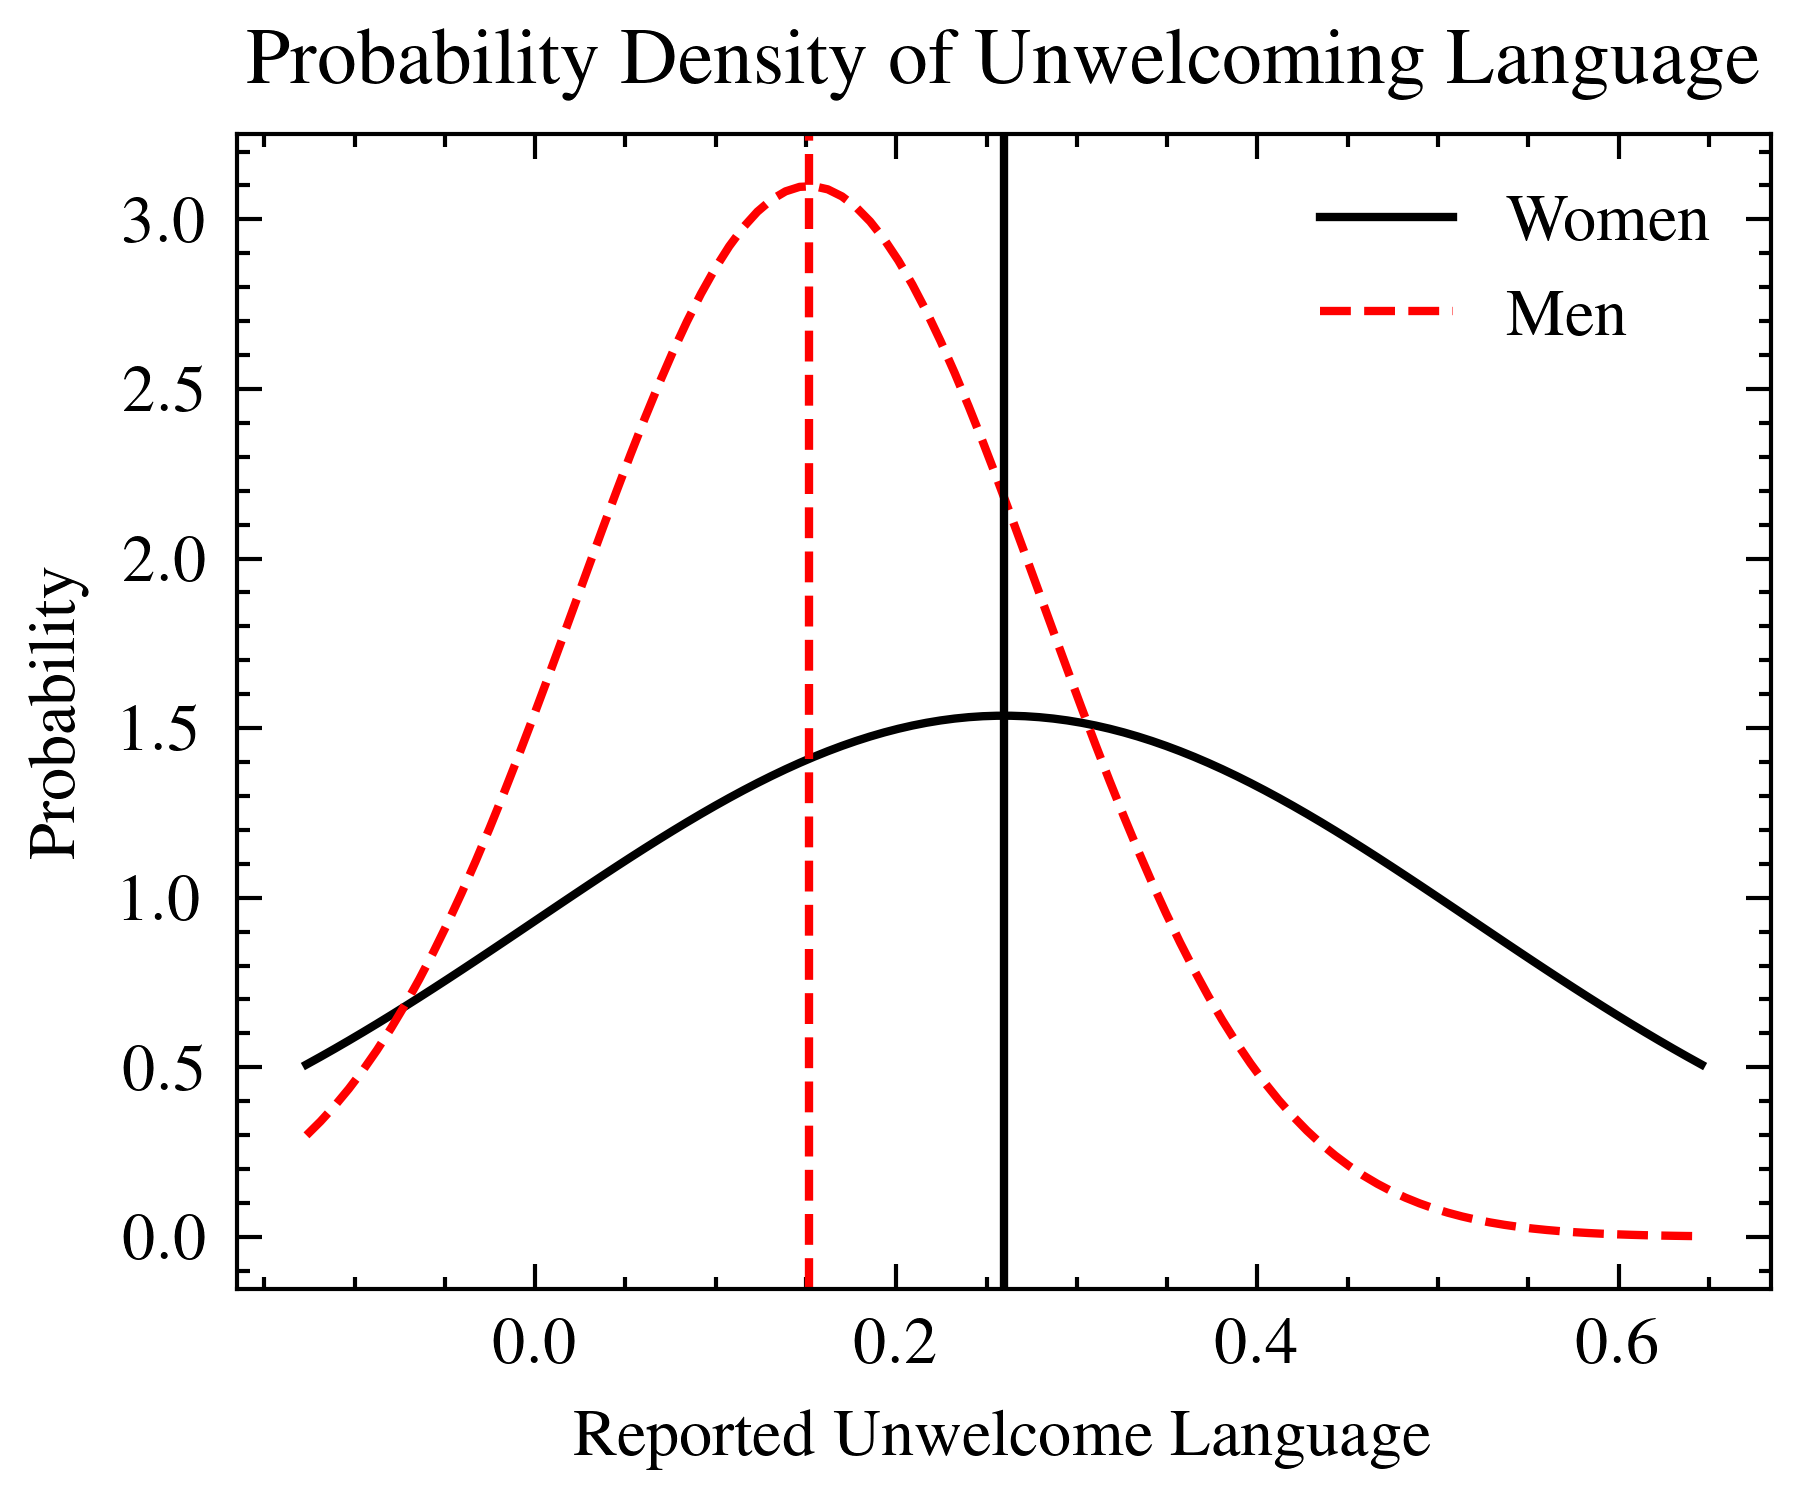

In [67]:
survey_gender_neg = survey_df[["DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE", "GENDER"]]
survey_gender_neg = survey_gender_neg[
    survey_gender_neg["GENDER"].isin(["Man", "Woman", "Non-binary  or Other"])
]
survey_gender_neg = survey_gender_neg[
    survey_gender_neg["DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE"].isin(["No", "Yes"])
]
survey_gender_neg["DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE"] = survey_gender_neg[
    "DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE"
].replace({"Yes": True, "No": False})

# Here we would like to compare the mean between two groups.

from scipy.stats import ttest_ind

women = survey_gender_neg[survey_gender_neg["GENDER"] == "Woman"]
men = survey_gender_neg[survey_gender_neg["GENDER"] == "Man"]

# H_0: people experience unwelcoming language at a rate of: 16%
print(survey_gender_neg["DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE"].mean())

# H_1: Women experience unwelcoming language at a rate of: 26%
print(f'women mean: {women["DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE"].mean()}')
print(f'women var: {women["DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE"].var()}')
# H_1: Men experience unwelcobing language at a rate of: 15%
print(f'men mean: {men["DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE"].mean()}')
print(f'men var: {men["DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE"].var()}')

# Is this divergence in mean enough to show a relationship between

result = ttest_ind(
    women["DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE"],
    men["DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE"],
    equal_var=False,
)
# Due to the vastly different sample sizes, it is unlikely that variance will be identicl.
# We perform Welch's unequal variances t-test.

print(result)

# This is still a t-statistic greater than 2.5, well within the rejection region, with a p-value of 0.015, meaning that we can confidently reject the null hypothesis.
# Even though we were only able to sample a few women, the incidents of reporting unwelcoming language can not be explained by random variation.

import scipy.stats as stats

mua = women["DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE"].mean()
sigmaa = women["DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE"].mean()
mu = men["DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE"].mean()
sigma = men["DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE"].var()
x = np.linspace(mua - 3 * sigma, mua + 3 * sigma, 100)
plt.plot(x, stats.norm.pdf(x, mua, sigmaa), label="Women")
plt.plot(x, stats.norm.pdf(x, mu, sigma), label="Men")
plt.axvline(mua)
plt.axvline(mu, color="red", linestyle="--")
plt.title("Probability Density of Unwelcoming Language")
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Reported Unwelcome Language')
if WRITEFIGS:
    plt.savefig('womenmenlanguage.pgf')
plt.show()

In [68]:
# behaviours = [
#     "DISCOURAGING.BEHAVIOR.LACK.OF.RESPONSE",
#     "DISCOURAGING.BEHAVIOR.REJECTION.WOUT.EXPLANATION",
#     "DISCOURAGING.BEHAVIOR.DISMISSIVE.RESPONSE",
#     "DISCOURAGING.BEHAVIOR.BAD.DOCS",
#     "DISCOURAGING.BEHAVIOR.CONFLICT",
# ]
# for b in behaviours:
#     survey_gender_neg = survey_df[[b, "GENDER"]]
#     survey_gender_neg = survey_gender_neg[
#         survey_gender_neg["GENDER"].isin(["Man", "Woman", "Non-binary  or Other"])
#     ]
#     survey_gender_neg = survey_gender_neg[survey_gender_neg[b].isin([True,False])]

#     # Here we would like to compare the mean between two groups.

#     women = survey_gender_neg[survey_gender_neg["GENDER"] == "Woman"]
#     men = survey_gender_neg[survey_gender_neg["GENDER"] == "Man"]
#     values = ttest_ind(women[b],
#             men[b],
#             equal_var=False,
#         )

In [69]:
women_true = (women["DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE"] == True).sum()
women_false = (women["DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE"] == False).sum()
men_true = (men["DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE"] == True).sum()
men_false = (men["DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE"] == False).sum()
women_count = women["DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE"].count()
men_count = men["DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE"].count()
data = {
    "Column": ["Women", "Men", "Total"],
    "Yes": [women_true, men_true, women_true + men_true],
    "No": [women_false, men_false, women_false + men_false],
    "Total": [women_count, men_count, women_count + men_count],
}

df = pd.DataFrame(data)
df.set_index("Column")

print(df.to_latex(index=False))

\begin{tabular}{lrrr}
\toprule
Column &  Yes &   No &  Total \\
\midrule
 Women &   27 &   77 &    104 \\
   Men &  435 & 2432 &   2867 \\
 Total &  462 & 2509 &   2971 \\
\bottomrule
\end{tabular}



/var/folders/_g/mvdjxyln17v1b315lhjlb1vw0000gn/T/ipykernel_37064/3625570567.py:17: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))


In [70]:
from scipy.stats import kendalltau, chi2_contingency, spearmanr

survey_pro_trans = survey_df[
    ["PROFESSIONAL.SOFTWARE", "TRANSPARENCY.PRIVACY.PRACTICES.OSS"]
]
survey_pro_trans = survey_pro_trans[survey_pro_trans["PROFESSIONAL.SOFTWARE"].notna()]
survey_pro_trans = survey_pro_trans[
    survey_pro_trans["TRANSPARENCY.PRIVACY.PRACTICES.OSS"].notna()
]

survey_pro_trans_map = survey_pro_trans.copy()
print(survey_pro_trans_map["PROFESSIONAL.SOFTWARE"].value_counts())
print(survey_pro_trans_map["TRANSPARENCY.PRIVACY.PRACTICES.OSS"].value_counts())

mapping_pro = {"Frequently": 3, "Occasionally": 2, "Rarely": 1, "Never": 0}
mappiong_name = {
    "I include my real name.": 3,
    "I usually contribute using a consistent pseudonym that is easily linked to my real name online.": 2,
    "I usually contribute using a consistent pseudonym that is not linked anywhere with my real name online. ": 1,
    "I take precautions to use different usernames  in different projects.": 0,
}

survey_pro_trans_map["PROFESSIONAL.SOFTWARE"] = survey_pro_trans_map[
    "PROFESSIONAL.SOFTWARE"
].map(mapping_pro)

survey_pro_trans_map["TRANSPARENCY.PRIVACY.PRACTICES.OSS"] = survey_pro_trans_map[
    "TRANSPARENCY.PRIVACY.PRACTICES.OSS"
].map(mappiong_name)

corr, p_value = spearmanr(
    survey_pro_trans_map["PROFESSIONAL.SOFTWARE"],
    survey_pro_trans_map["TRANSPARENCY.PRIVACY.PRACTICES.OSS"],
)
print("kendall's tau coefficient:", corr)
print("p-value:", p_value)

neg_table = pd.crosstab(
    survey_pro_trans["PROFESSIONAL.SOFTWARE"],
    survey_pro_trans["TRANSPARENCY.PRIVACY.PRACTICES.OSS"],
)
expected_neg = chi2_contingency(neg_table)
n = neg_table.values.sum()
phi = np.sqrt(expected_neg[0] / n)
v = phi / np.sqrt(min(neg_table.shape) - 1)
dof = min(neg_table.shape) - 1
# Print the results

print("+++++++++++++++++++++++++++++++++++++++")
print(expected_neg[1])
print("Cramer's V coefficient:", v)
print("The degree of freedom is:", dof)

Frequently      1286
Occasionally     218
Rarely           109
Never             85
Name: PROFESSIONAL.SOFTWARE, dtype: int64
I include my real name.                                                                                     1116
I usually contribute using a consistent pseudonym that is easily linked to my real name online.              447
I usually contribute using a consistent pseudonym that is not linked anywhere with my real name online.      119
I take precautions to use different usernames  in different projects.                                         16
Name: TRANSPARENCY.PRIVACY.PRACTICES.OSS, dtype: int64
kendall's tau coefficient: 0.14009214983238702
p-value: 6.74687873273864e-09
+++++++++++++++++++++++++++++++++++++++
3.6746455799467756e-09
Cramer's V coefficient: 0.1064490553655921
The degree of freedom is: 3


In [71]:
neg_table

TRANSPARENCY.PRIVACY.PRACTICES.OSS,I include my real name.,I take precautions to use different usernames in different projects.,I usually contribute using a consistent pseudonym that is easily linked to my real name online.,I usually contribute using a consistent pseudonym that is not linked anywhere with my real name online.
PROFESSIONAL.SOFTWARE,,,,
Frequently,888,7,313,78
Never,35,4,33,13
Occasionally,132,1,68,17
Rarely,61,4,33,11
